In [17]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pandas as pd
from tqdm import tqdm 

## Important Function

In [18]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

## Plain MD

In [19]:
plain_md_path = '../Plain_MD/analysis'

## Load the error from MSM

df_stationary_p = pd.read_csv(f"{plain_md_path}/autocoorel_data/trans_population_at_lagtime_8conform.csv")
#print(df_stationary_p)


# Pivot the DataFrame to reshape it
pivot_mean = df_stationary_p.pivot(index='thermo_state', columns='conform_state', values='mean')
pivot_std = df_stationary_p.pivot(index='thermo_state', columns='conform_state', values='std')

# Convert to NumPy arrays
plain_md_refer_array = pivot_mean.to_numpy()  # shape (1, 8) state, residues 
plain_md_refer_err_array = pivot_std.to_numpy()  # shape (1, 8)
plain_md_refer_array.shape

(1, 8)

In [20]:
plain_md_path = '../Plain_MD/analysis'


population_loaded = Data.load(f"{plain_md_path}/population_data/population_8_conform.pkl").array_list
population_mean = population_loaded[0]
population_std = population_loaded[1]

plain_md_population_mean = population_mean
plain_md_population_std = population_std
plain_md_population_mean.shape

(8, 345495)

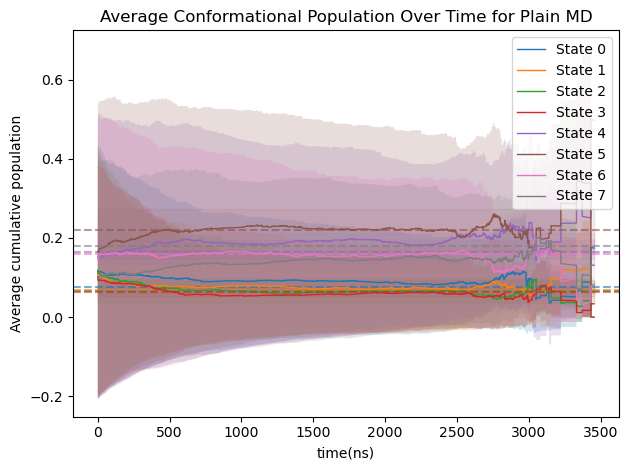

In [21]:
conform_num = 8
T = plain_md_population_mean.shape[1]
x = np.arange(T)
dt_in_ns = 0.01

for i in range(conform_num):
    mean = plain_md_population_mean[i]
    std = plain_md_population_std[i]

    plt.plot(x * dt_in_ns, mean, label=f"State {i}", linewidth=1)
    plt.fill_between(x * dt_in_ns, mean - std, mean + std, alpha=0.2)

    ref_y= plain_md_refer_array[:, i]
    ref_yerr = plain_md_refer_err_array[:, i]
    plt.axhline(y=ref_y, linestyle='--', color=f'C{i}', alpha=0.6)
    plt.fill_between(x * dt_in_ns, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{i}', alpha=0.1)

plt.xlabel("time(ns)")
plt.ylabel("Average cumulative population")
plt.title("Average Conformational Population Over Time for Plain MD")
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## EE

In [22]:
## Load in the refer data 

ee_path = '../EE/analysis'

df_stationary_p = pd.read_csv(f"{ee_path}/autocoorel_data/trans_population_at_lagtime_8conforms.csv")
#print(df_stationary_p)

    
# Pivot the DataFrame to reshape it
pivot_mean = df_stationary_p.pivot(index='thermo_state', columns='conform_state', values='mean')
pivot_std = df_stationary_p.pivot(index='thermo_state', columns='conform_state', values='std')

# Convert to NumPy arrays
ee_refer_array = pivot_mean.to_numpy()  # shape (6, 3) state, residues 
ee_refer_err_array = pivot_std.to_numpy()  # shape (6, 3)
ee_refer_array.shape

(4, 8)

In [23]:
ee_path = '../EE/analysis'

population_loaded = Data.load(f"{ee_path}/population_data/population_8_conform.pkl").array_list
population_mean = population_loaded[0]
population_std = population_loaded[1]

ee_population_mean = population_mean
ee_population_std = population_std
ee_population_mean.shape

(4, 8, 91002)

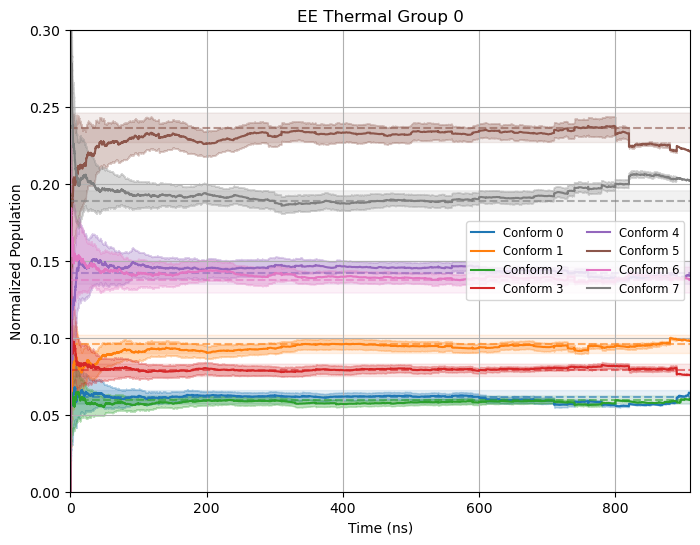

In [24]:
dt_in_ns = 0.01  # 10 ps = 0.01 ns

conform_num = 8
thermal_num = 1 # only plot the state 0 

for thermal in range(thermal_num):
    time = np.arange(ee_population_mean.shape[2])
    time_ns = time * dt_in_ns  # Convert to nanoseconds

    plt.figure(figsize=(8, 6))

    for conform in range(conform_num):
        mean = ee_population_mean[thermal, conform, :]
        std = ee_population_std[thermal, conform, :]

        # Plot and capture the line object to get the color
        line, = plt.plot(time_ns, mean, label=f'Conform {conform}')
        plt.fill_between(time_ns, mean - std, mean + std, alpha=0.3, color=line.get_color())
        
        # Reference horizontal line
        ref_y = ee_refer_array[thermal, conform]
        ref_yerr = ee_refer_err_array[thermal, conform]

        plt.axhline(y=ref_y, linestyle='--', color=f'C{conform}', alpha=0.6)
        plt.fill_between(x, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{conform}', alpha=0.1)

    plt.ylim(0, 0.3)
    plt.xlim(time_ns[0], time_ns[-1])  # Optional but precise
    plt.xlabel("Time (ns)")
    plt.ylabel("Normalized Population")
    plt.title(f"EE Thermal Group {thermal}")
    plt.legend(loc='right',fontsize='small', ncol=2)
    plt.grid(True)
    #plt.tight_layout()
    plt.show()


## HREX

In [25]:
hrex_path = '../HREX/analysis'

df_stationary_p = pd.read_csv(f"{hrex_path}/autocoorel_data/trans_population_at_lagtime_8conforms.csv")
#print(df_stationary_p)
#     
# Pivot the DataFrame to reshape it
pivot_mean = df_stationary_p.pivot(index='thermo_state', columns='conform_state', values='mean')
pivot_std = df_stationary_p.pivot(index='thermo_state', columns='conform_state', values='std')

# Convert to NumPy arrays
hrex_trans_refer_array = pivot_mean.to_numpy()  # shape (6, 3) state, residues
hrex_trans_refer_err_array = pivot_std.to_numpy()  # shape (6, 3)
hrex_trans_refer_array.shape

(6, 8)

In [26]:
hrex_path = '../HREX/analysis'


population_loaded = Data.load(f"{hrex_path}/population_data/population_8_conform.pkl").array_list
population_mean = population_loaded[0]
hrex_population_mean = population_mean
hrex_population_mean.shape

(6, 8, 600030)

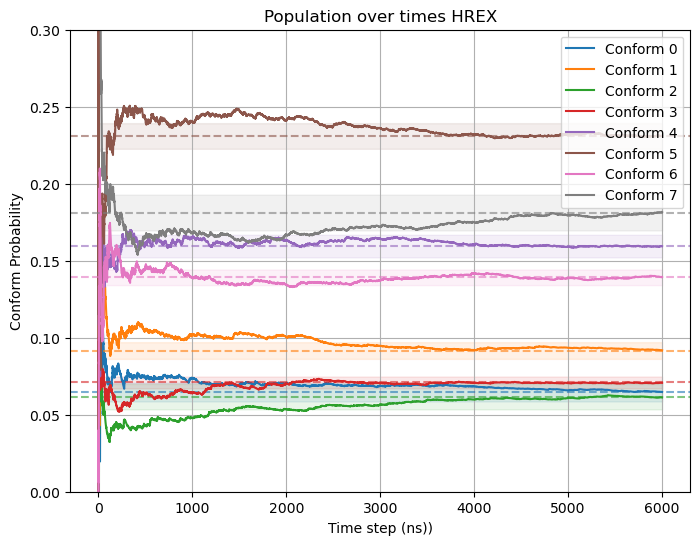

In [27]:
thermo_num = 1
conform_num = 8
dt_in_ns = 0.01

for thermo in range(thermo_num):  # Loop over 6 thermodynamic states
    plt.figure(figsize=(8, 6))
    
    for conform in range(conform_num):  # Loop over 8 conformational states
        y = hrex_population_mean[thermo, conform, :]
        x = np.arange(len(y))  # or use actual time values
        plt.plot(x * dt_in_ns, y, label=f'Conform {conform}')

        # Reference horizontal line
        ref_y = hrex_trans_refer_array[thermo, conform]
        ref_yerr = hrex_trans_refer_err_array[thermo, conform]

        plt.axhline(y=ref_y, linestyle='--', color=f'C{conform}', alpha=0.6)
        plt.fill_between(x * dt_in_ns, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{conform}', alpha=0.1)

    plt.title(f'Population over times HREX')
    plt.xlabel('Time step (ns))')
    plt.ylabel('Conform Probability')
    plt.ylim(0, 0.3)
    plt.grid(True)
    plt.legend(loc="best")
    #plt.tight_layout()
    plt.show()


## REDs

In [28]:
reds_path = '../REDs/analysis'
df_stationary_p = pd.read_csv(f"{reds_path}/autocoorel_data/trans_population_at_lagtime_8conforms.csv")
#print(df_stationary_p)

# Pivot the DataFrame to reshape it
pivot_mean = df_stationary_p.pivot(index='thermo_state', columns='conform_state', values='mean')
pivot_std = df_stationary_p.pivot(index='thermo_state', columns='conform_state', values='std')

# Convert to NumPy arrays
reds_trans_refer_array = pivot_mean.to_numpy()  # shape (6, 3) state, residues 
reds_trans_refer_err_array = pivot_std.to_numpy()  # shape (6, 3)
reds_trans_refer_err_array.shape

(3, 8)

In [29]:
reds_path = '../REDs/analysis'


population_loaded = Data.load(f"{reds_path}/population_data/population_8_conform.pkl").array_list
population_mean = population_loaded[0]

reds_population_mean = population_mean
reds_population_mean.shape

(3, 8, 337514)

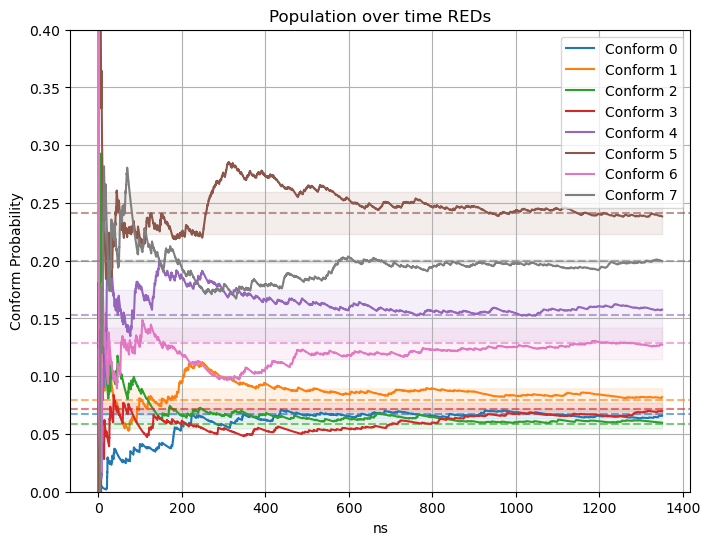

In [30]:
thermo_num = 1
conform_num = 8
dt_in_ns = 0.004 # 4ps

for thermo in range(thermo_num):  # Loop over 6 thermodynamic states
    plt.figure(figsize=(8, 6))
    
    for conform in range(conform_num):  # Loop over 8 conformational states
        y = reds_population_mean[thermo, conform, :]
        x = np.arange(len(y))  # or use actual time values

        plt.plot(x * dt_in_ns, y, label=f'Conform {conform}')

        # Reference horizontal line
        ref_y = reds_trans_refer_array[thermo, conform]
        ref_yerr = reds_trans_refer_err_array[thermo, conform]

        plt.axhline(y=ref_y, linestyle='--', color=f'C{conform}', alpha=0.6)
        plt.fill_between(x * dt_in_ns, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{conform}', alpha=0.1)

    plt.title(f'Population over time REDs')
    plt.xlabel('ns')
    plt.ylabel('Conform Probability')
    plt.ylim(0, 0.4)
    plt.grid(True)
    plt.legend(loc="best")
    #plt.tight_layout()
    plt.show()


## Combined Plot 

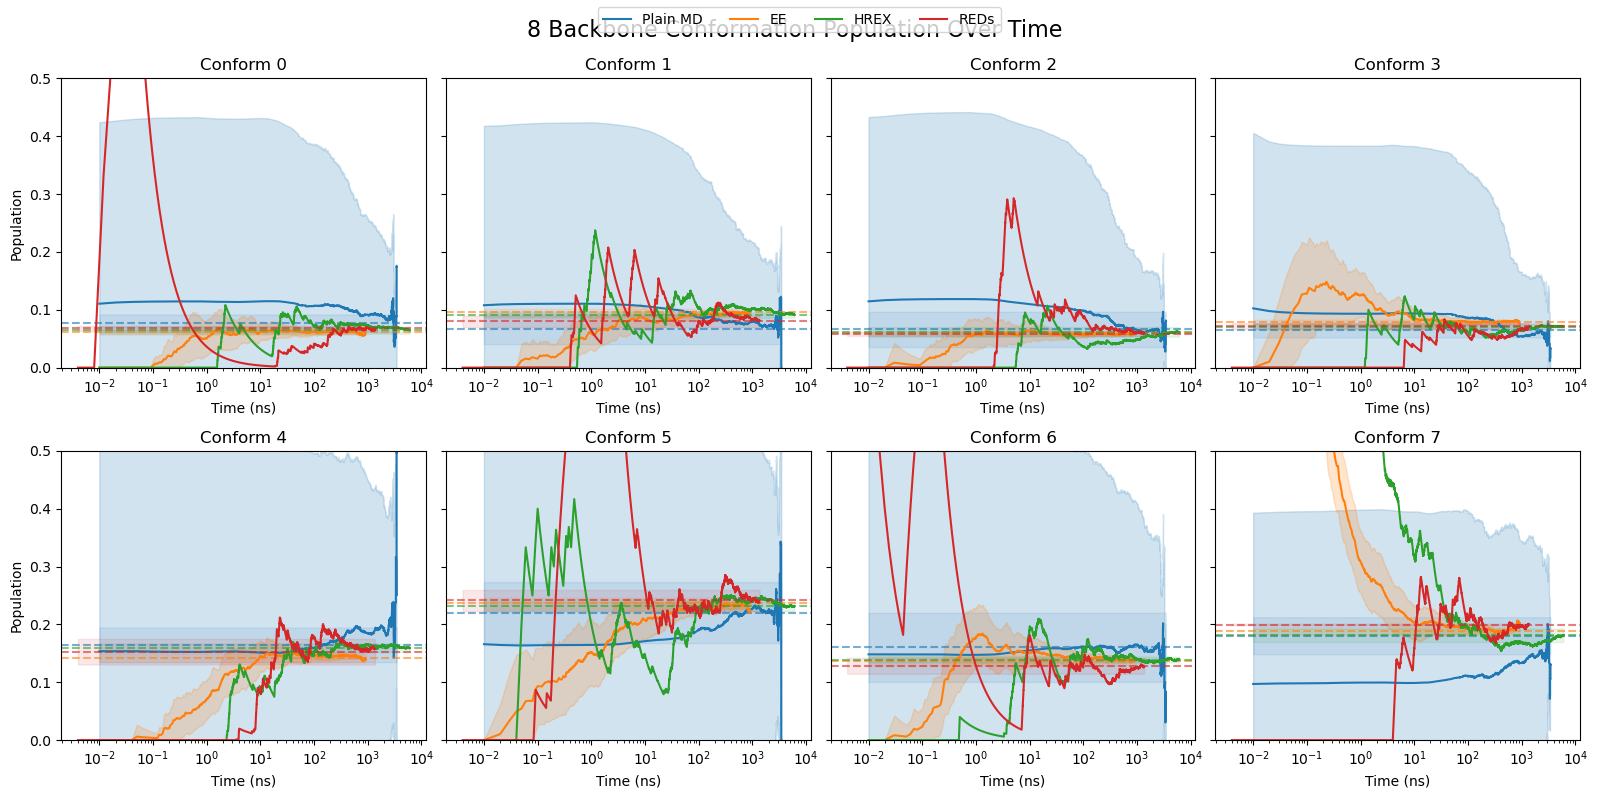

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Optional settings
use_ylim = True
ylim_low = 0
ylim_high = 0.5
use_logscale_x = True  # Set to True to use log scale on x-axis

# Constants
conform_num = 8
colors = ['C0', 'C1', 'C2', 'C3']  # One color per method

# Create 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for conform in range(conform_num):
    ax = axes[conform]

    # --- Plain MD ---
    x = np.arange(1, plain_md_population_mean.shape[1] + 1)
    time_md = x * 0.01
    mean = plain_md_population_mean[conform]
    std = plain_md_population_std[conform]
    ref = plain_md_refer_array[:, conform]
    ref_err = plain_md_refer_err_array[:, conform]

    ax.plot(time_md, mean, label='Plain MD', color=colors[0])
    ax.fill_between(time_md, mean - std, mean + std, color=colors[0], alpha=0.2)
    ax.axhline(ref, linestyle='--', color=colors[0], alpha=0.6)
    ax.fill_between(time_md, ref - ref_err, ref + ref_err, color=colors[0], alpha=0.1)

    # --- EE ---
    x = np.arange(1, ee_population_mean.shape[2] + 1)
    time_ee = x * 0.01
    mean = ee_population_mean[0, conform, :]
    std = ee_population_std[0, conform, :]
    ref = ee_refer_array[0, conform]
    ref_err = ee_refer_err_array[0, conform]

    ax.plot(time_ee, mean, label='EE', color=colors[1])
    ax.fill_between(time_ee, mean - std, mean + std, color=colors[1], alpha=0.2)
    ax.axhline(ref, linestyle='--', color=colors[1], alpha=0.6)
    ax.fill_between(time_ee, ref - ref_err, ref + ref_err, color=colors[1], alpha=0.1)

    # --- HREX ---
    x = np.arange(1, hrex_population_mean.shape[2] + 1)
    time_hrex = x * 0.01
    mean = hrex_population_mean[0, conform, :]
    ref = hrex_trans_refer_array[0, conform]
    ref_err = hrex_trans_refer_err_array[0, conform]

    ax.plot(time_hrex, mean, label='HREX', color=colors[2])
    ax.axhline(ref, linestyle='--', color=colors[2], alpha=0.6)
    ax.fill_between(time_hrex, ref - ref_err, ref + ref_err, color=colors[2], alpha=0.1)

    # --- REDs ---
    x = np.arange(1, reds_population_mean.shape[2] + 1)
    time_reds = x * 0.004
    mean = reds_population_mean[0, conform, :]
    ref = reds_trans_refer_array[0, conform]
    ref_err = reds_trans_refer_err_array[0, conform]

    ax.plot(time_reds, mean, label='REDs', color=colors[3])
    ax.axhline(ref, linestyle='--', color=colors[3], alpha=0.6)
    ax.fill_between(time_reds, ref - ref_err, ref + ref_err, color=colors[3], alpha=0.1)

    # Axis settings
    ax.set_title(f'Conform {conform}')
    ax.set_xlabel('Time (ns)')
    if use_logscale_x:
        ax.set_xscale('log')
    if use_ylim:
        ax.set_ylim(ylim_low, ylim_high)
    if conform % 4 == 0:
        ax.set_ylabel('Population')
        
# Global legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize='medium')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('8 Backbone Conformation Population Over Time', fontsize=16)
plt.savefig("fig/population_over_time_all_8_conform_log_scale_plot.png", dpi=300)
plt.show()


/var/folders/d8/y2dvs1ln1gjcwccrkvtffr240000gn/T/ipykernel_25533/3428829989.py:115: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/var/folders/d8/y2dvs1ln1gjcwccrkvtffr240000gn/T/ipykernel_25533/3428829989.py:117: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("fig/population_over_time_all_8_conform_plot.png", dpi=300)
/Users/starwing/miniconda3/envs/peptoid_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


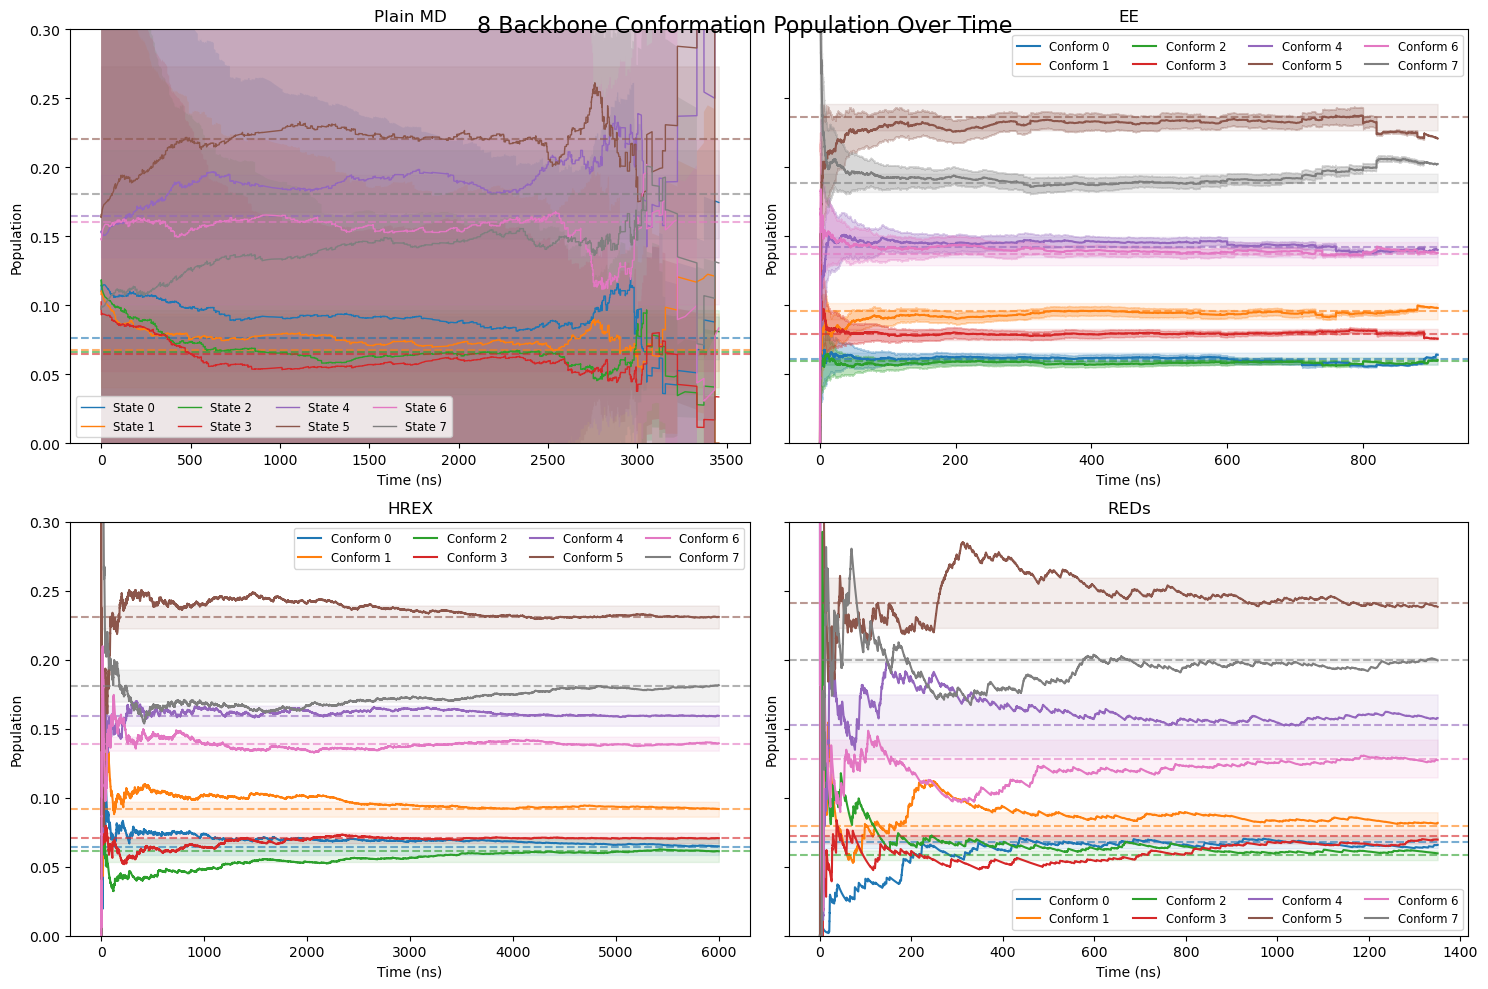

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Optional settings
ylim_low = 0
ylim_high = 0.3
use_ylim = True
use_logscale_x = False  # Set to True to enable log scale on the x-axis
ncol = 4

fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
axes = axes.flatten()

# --- Plot 1: Plain MD ---
ax = axes[0]
T = plain_md_population_mean.shape[1]
dt_in_ns = 0.01
x = np.arange(1, T + 1)  # Avoid starting at zero for log scale
time_ns = x * dt_in_ns

for i in range(conform_num):
    mean = plain_md_population_mean[i]
    std = plain_md_population_std[i]
    ref_y = plain_md_refer_array[:, i]
    ref_yerr = plain_md_refer_err_array[:, i]

    ax.plot(time_ns, mean, label=f"State {i}", linewidth=1)
    ax.fill_between(time_ns, mean - std, mean + std, alpha=0.2)
    ax.axhline(y=ref_y, linestyle='--', color=f'C{i}', alpha=0.6)
    ax.fill_between(time_ns, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{i}', alpha=0.1)

ax.set_title("Plain MD")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Population")
if use_logscale_x:
    ax.set_xscale('log')
if use_ylim:
    ax.set_ylim(ylim_low, ylim_high)
ax.legend(fontsize='small', ncol=ncol)

# --- Plot 2: EE ---
ax = axes[1]
dt_in_ns = 0.01
x = np.arange(1, ee_population_mean.shape[2] + 1)
time_ns = x * dt_in_ns

for conform in range(conform_num):
    mean = ee_population_mean[0, conform, :]
    std = ee_population_std[0, conform, :]
    ref_y = ee_refer_array[0, conform]
    ref_yerr = ee_refer_err_array[0, conform]

    line, = ax.plot(time_ns, mean, label=f"Conform {conform}")
    ax.fill_between(time_ns, mean - std, mean + std, alpha=0.3, color=line.get_color())
    ax.axhline(y=ref_y, linestyle='--', color=f'C{conform}', alpha=0.6)
    ax.fill_between(time_ns, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{conform}', alpha=0.1)

ax.set_title("EE")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Population")
if use_logscale_x:
    ax.set_xscale('log')
if use_ylim:
    ax.set_ylim(ylim_low, ylim_high)
ax.legend(fontsize='small', ncol=ncol)

# --- Plot 3: HREX ---
ax = axes[2]
dt_in_ns = 0.01
x = np.arange(1, hrex_population_mean.shape[2] + 1)
time_ns = x * dt_in_ns

for conform in range(conform_num):
    y = hrex_population_mean[0, conform, :]
    ref_y = hrex_trans_refer_array[0, conform]
    ref_yerr = hrex_trans_refer_err_array[0, conform]

    ax.plot(time_ns, y, label=f'Conform {conform}')
    ax.axhline(y=ref_y, linestyle='--', color=f'C{conform}', alpha=0.6)
    ax.fill_between(time_ns, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{conform}', alpha=0.1)

ax.set_title("HREX")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Population")
if use_logscale_x:
    ax.set_xscale('log')
if use_ylim:
    ax.set_ylim(ylim_low, ylim_high)
ax.legend(fontsize='small', ncol=ncol)

# --- Plot 4: REDs ---
ax = axes[3]
dt_in_ns = 0.004
x = np.arange(1, reds_population_mean.shape[2] + 1)
time_ns = x * dt_in_ns

for conform in range(conform_num):
    y = reds_population_mean[0, conform, :]
    ref_y = reds_trans_refer_array[0, conform]
    ref_yerr = reds_trans_refer_err_array[0, conform]

    ax.plot(time_ns, y, label=f'Conform {conform}')
    ax.axhline(y=ref_y, linestyle='--', color=f'C{conform}', alpha=0.6)
    ax.fill_between(time_ns, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{conform}', alpha=0.1)

ax.set_title("REDs")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Population")
if use_logscale_x:
    ax.set_xscale('log')
if use_ylim:
    ax.set_ylim(ylim_low, ylim_high)
ax.legend(fontsize='small', ncol=ncol)

plt.tight_layout()
plt.suptitle('8 Backbone Conformation Population Over Time', fontsize=16)
plt.savefig("fig/population_over_time_all_8_conform_plot.png", dpi=300)
plt.show()
